In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import formula
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [169]:
data = pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [170]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [172]:
#correlation
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


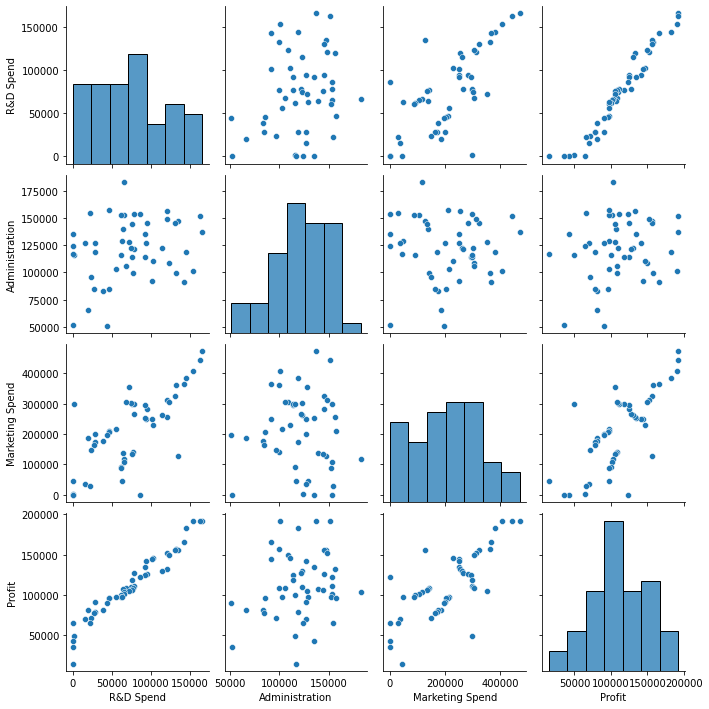

In [173]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


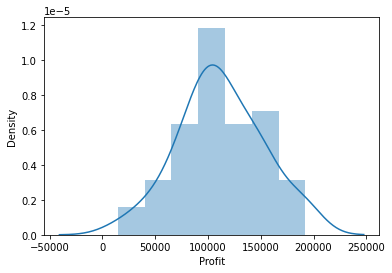

In [174]:
sns.distplot(data['Profit'])

In [175]:
data = data.rename({'R&D Spend':'RD_spend','Marketing Spend':'Marketing_Spend'},axis=1)
data

,RD_spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [176]:
data.drop('State',axis=1)

,RD_spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [177]:
model = smf.ols("Profit~RD_spend+Administration+Marketing_Spend+Profit",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.288e+30
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        18:20:56   Log-Likelihood:                 1115.4
No. Observations:                  50   AIC:                            -2221.
Df Residuals:                      45   BIC:                            -2211.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.274e-11    5.6e-11      0.585      0.562      -8e-11    1.45e-10
RD_spend        -7.772e-16   7.19e-16     -1.080      0.286   -2.23e-15    6.72e-16
Administration   5.135e-16    2.9e-16      1.772      0.083      -7e-17     1.1e-15
Marketing_Spend  2.776e-16   9.59e-17      2.896      0.006    8.45e-17    4.71e-16
Profit              1.0000   8.35e-16    1.2e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        1.256   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                0.619
Skew:                          -0.237   Prob(JB):                        0.734
Kurtosis:                       3.271   Cond. No.                     2.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
model.params

Intercept          3.274181e-11
RD_spend          -7.771561e-16
Administration     5.134781e-16
Marketing_Spend    2.775558e-16
Profit             1.000000e+00
dtype: float64

In [179]:
print(model.tvalues, '\n', model.pvalues)

Intercept          5.848959e-01
RD_spend          -1.080383e+00
Administration     1.772449e+00
Marketing_Spend    2.895728e+00
Profit             1.198245e+15
dtype: float64 
 Intercept          0.561539
RD_spend           0.285728
Administration     0.083090
Marketing_Spend    0.005819
Profit             0.000000
dtype: float64


In [180]:
(model.rsquared,model.rsquared_adj)

(1.0, 1.0)

In [181]:
md= smf.ols("Profit~RD_spend",data=data).fit()
print(md.tvalues, '\n' , md.pvalues)

Intercept    19.320288
RD_spend     29.151139
dtype: float64 
 Intercept    2.782697e-24
RD_spend     3.500322e-32
dtype: float64


In [182]:
 md= smf.ols("Profit~Administration",data=data).fit()
 print(md.tvalues, '\n' , md.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [183]:
 md= smf.ols("Profit~RD_spend+Administration",data=data).fit()
 md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sat, 07 May 2022   Prob (F-statistic):           7.29e-31
Time:                        18:20:56   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RD_spend           0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
rsq_RD = smf.ols("RD_spend~Marketing_Spend+Administration",data=data).fit().rsquared
vif_RD = 1/(1-rsq_RD) 
rsq_A = smf.ols("Administration~RD_spend+Marketing_Spend",data=data).fit().rsquared  
vif_A= 1/(1-rsq_A) 
rsq_M= smf.ols("Marketing_Spend~Administration+RD_spend",data=data).fit().rsquared  
vif_M = 1/(1-rsq_M) 
d1={'Variables':['Administration','RD_spend','Marketing_Spend'],'VIF':[vif_A,vif_RD,vif_M]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Administration,1.175091
1,RD_spend,2.468903
2,Marketing_Spend,2.326773


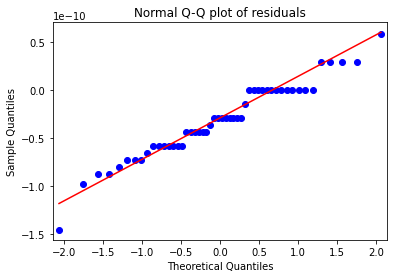

In [185]:
 import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [186]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

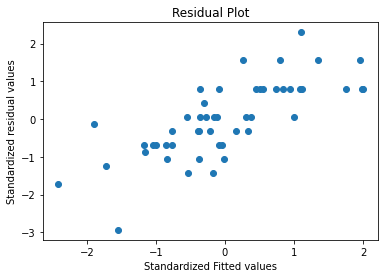

In [187]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

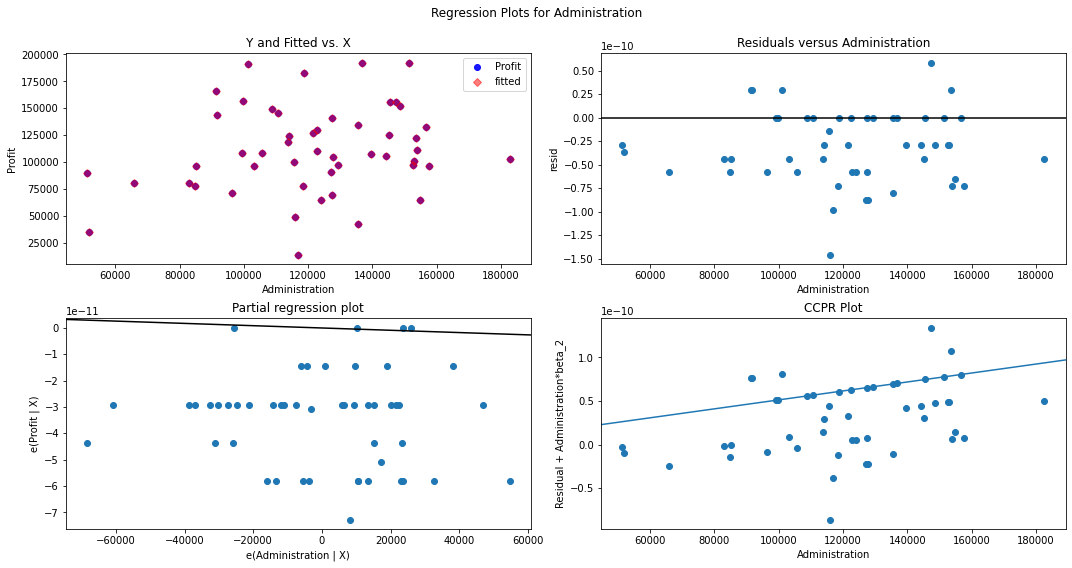

In [188]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

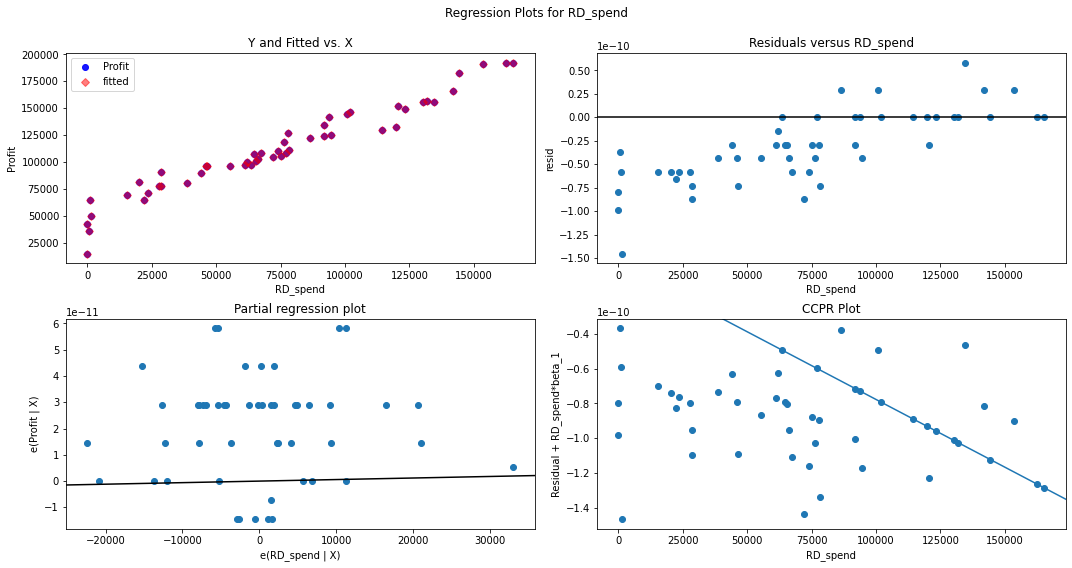

In [189]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_spend", fig=fig)
plt.show()

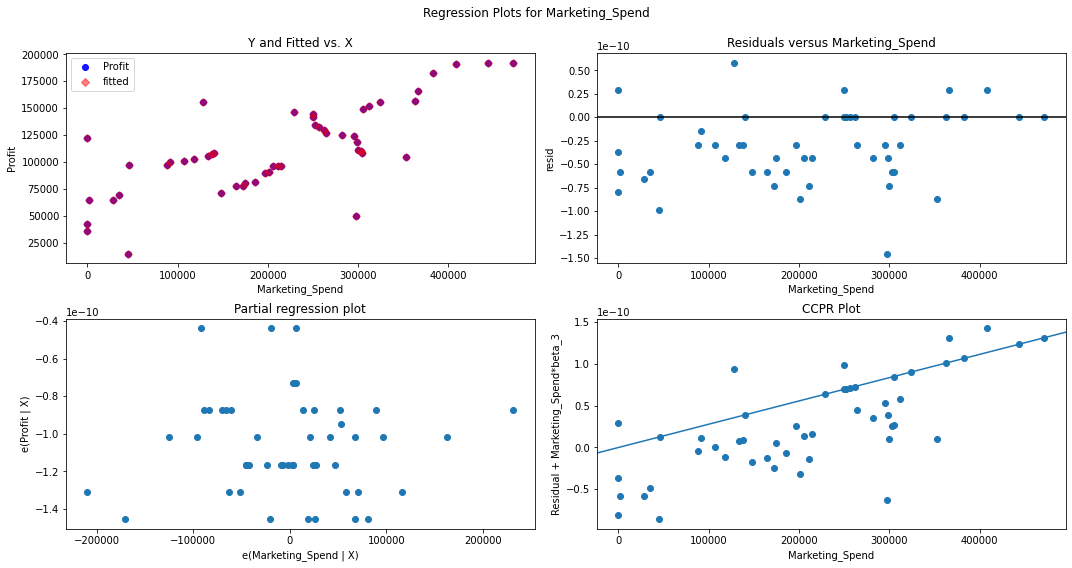

In [190]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

In [191]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([0.        , 0.        , 0.01070647, 0.        , 0.00954926,
       0.        , 0.06275229, 0.        , 0.00387434, 0.        ,
       0.        , 0.00620265, 0.        , 0.        , 0.        ,
       0.        , 0.00362173, 0.00776712, 0.00244332, 0.01869272,
       0.00615354, 0.04543535, 0.01448647, 0.01477362, 0.        ,
       0.00287217, 0.00350838, 0.08374572, 0.02395299, 0.00427881,
       0.00094108, 0.00470074, 0.        , 0.00477624, 0.05612571,
       0.0105743 , 0.09556629, 0.01275637, 0.05019448, 0.01024166,
       0.02226406, 0.01936456, 0.01499354, 0.026918  , 0.03805626,
       0.05738401, 0.6983652 , 0.05803505, 0.04738994, 0.6268495 ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


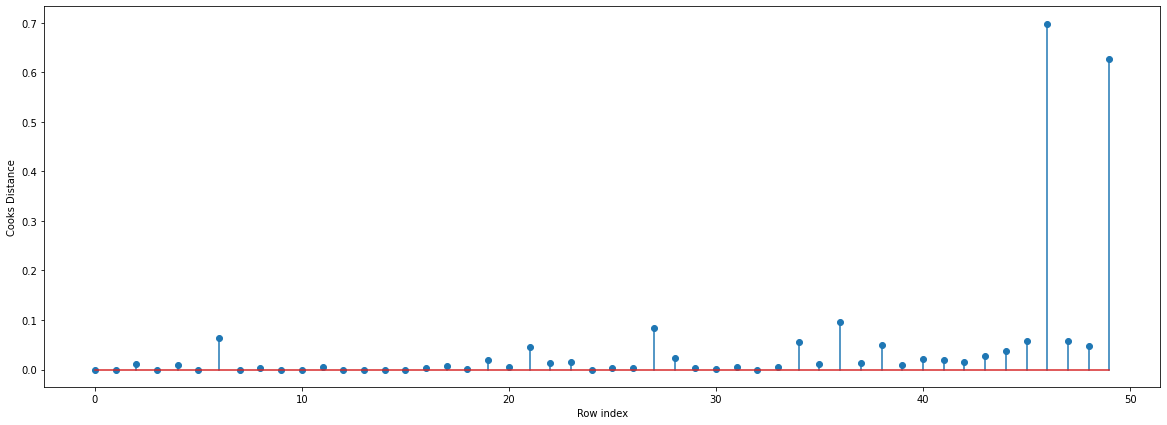

In [192]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [193]:
(np.argmax(c),np.max(c))

(46, 0.6983652046181171)

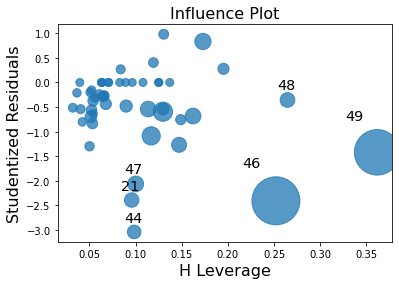

In [194]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [195]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [196]:
data[data.index.isin([47, 49])]

,RD_spend,Administration,Marketing_Spend,State,Profit
47,0.0,135426.92,0.00,California,42559.73
49,0.0,116983.80,45173.06,California,14681.40


In [198]:
data_new=data.drop(data.index[[47,49]],axis=0).reset_index()

In [199]:
data_new=data_new.drop(['index'],axis=1)


In [200]:
data_new

,RD_spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [209]:
final_Newdata= smf.ols('Profit~Administration+Marketing_Spend',data =data_new).fit()

In [210]:
(final_Newdata.rsquared,final_Newdata.aic)

(0.579904897269647, 1109.6575232827427)

In [212]:
final_Newdata= smf.ols('Profit~RD_spend+Marketing_Spend',data =data_new).fit()

In [213]:
(final_Newdata.rsquared,final_Newdata.aic)

(0.9588424786144887, 998.1499506151225)

In [229]:
new_data=pd.DataFrame({'Adiministration':100,'RD_spend':150,'Marketing_Spend':200},index=[1])
new_data

,Adiministration,RD_spend,Marketing_Spend
1,100,150,200


In [230]:
final_Newdata.predict(new_data)

1    50644.293843
dtype: float64